## <span style="color:#9932CC">Notebook 3</span>
### Yuritzy Pérez Corona 03/10/2023
#### Dataset: Boston Housing
![Casas en Boston](boston.jpg)
#### Información del dataset obtenido de la página (sin signos de pesos):
##### CRIM: Tasa de criminalidad per cápita por ciudad (número de delitos por persona).
##### ZN: Proporción de tierras residenciales zonificadas para lotes de más de 25,000 pies cuadrados (proporción de tierras residenciales grandes).
##### INDUS: Proporción de acres de negocios no minoristas por ciudad (proporción de terreno utilizado para negocios no minoristas).
##### CHAS: Variable ficticia Charles River (1 si el terreno limita con el río Charles; 0 en caso contrario).
##### NOX: Concentración de óxidos de nitrógeno (concentración de óxidos de nitrógeno en partes por 10 millones).
##### RM: Número promedio de habitaciones por vivienda.
##### AGE: Proporción de unidades ocupadas por el propietario construidas antes de 1940 (proporción de viviendas antiguas).
##### DIS: Distancias ponderadas a cinco centros de empleo de Boston (distancias ponderadas a centros de empleo).
##### RAD: Índice de accesibilidad a carreteras radiales (índice de accesibilidad a carreteras).
##### TAX: Tasa de impuesto a la propiedad de valor total por cada 10,000 (tasa de impuesto a la propiedad en 10,000).
##### PTRATIO: Relación alumno-profesor por ciudad (relación alumno-profesor).
##### B: 1000(Bk - 0.63)^2, donde Bk es la proporción de personas de raza negra por ciudad (índice ajustado).
##### LSTAT: Porcentaje de estado bajo de la población (porcentaje de población en estado bajo).
##### MEDV: Valor mediano de viviendas ocupadas por el propietario en 1000s (valor mediano de viviendas en miles de dólares).
#### Obtenido de: https://www.kaggle.com/datasets/vikrishnan/boston-house-prices/data

#### Importar librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import pearsonr
from scipy import stats
from sklearn.preprocessing import MinMaxScaler


#### Cargamos los datos

In [2]:
df = pd.read_csv("housing.csv", header=None, delimiter=r"\s+")
print(df.head())

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [3]:
print(df.shape)

(506, 14)


#### Renombramos las columnas poniendoles los nombres de las características

In [4]:
acronyms = [
    "CRIM",
    "ZN",
    "INDUS",
    "CHAS",
    "NOX",
    "RM",
    "AGE",
    "DIS",
    "RAD",
    "TAX",
    "PTRATIO",
    "B",
    "LSTAT",
    "PRICE"
]

df.columns = acronyms
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Tipos de datos de las características

In [5]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

### <span style="color:#9932CC">Análisis exploratorio de los datos</span>

#### Buscamos datos faltantes

In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### Encontramos que no hay datos faltantes, por lo que nuestros datos no necesitan eliminarlos.

#### Observamos la estadística de los datos

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### El precio será la variable dependiente, observaremos su distribución

C:\Users\lic.-Ing.Yuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lic.-Ing.Yuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


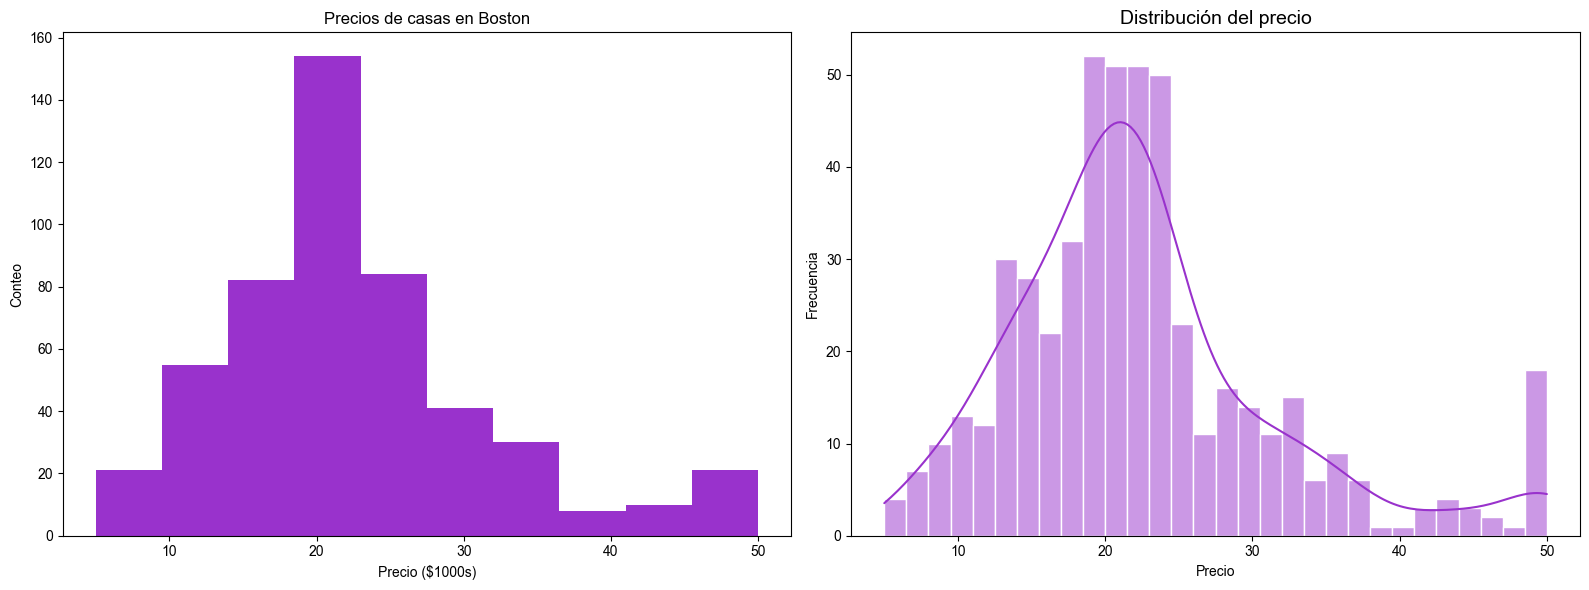

In [8]:
# Configura la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Primer subplot (histograma)
axes[0].hist(df['PRICE'], color='#9932CC')
axes[0].set_title('Precios de casas en Boston')
axes[0].set_xlabel('Precio ($1000s)')
axes[0].set_ylabel('Conteo')

# Segundo subplot (histograma con Seaborn)
sns.set_style("whitegrid")
feature_to_visualize = 'PRICE'
sns.histplot(df[feature_to_visualize], bins=30, kde=True, ax=axes[1], color='#9932CC')
axes[1].set_title(f'Distribución del precio', fontsize=14)
axes[1].set_xlabel('Precio')
axes[1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

C:\Users\lic.-Ing.Yuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\lic.-Ing.Yuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


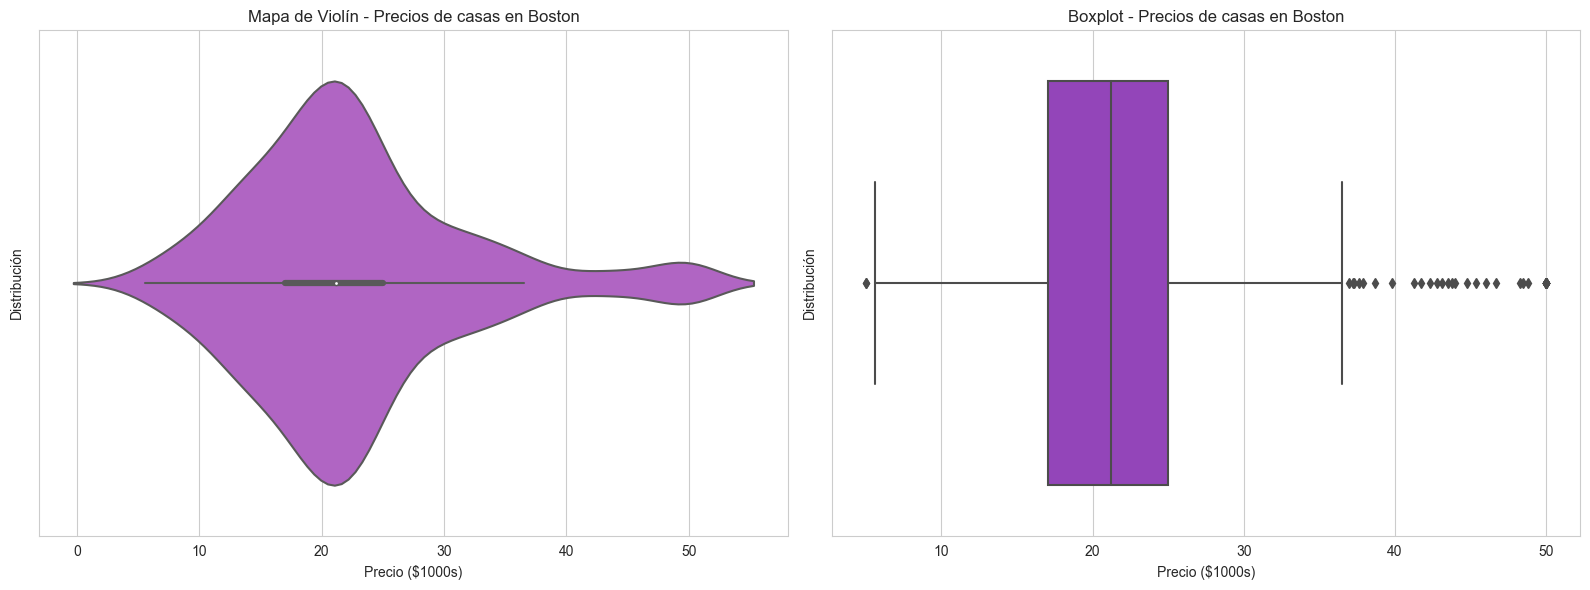

In [9]:
# Configura la figura y los subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Variable a visualizar
feature_to_visualize = 'PRICE'

# Primer subplot (mapa de violín)
sns.set_style("whitegrid")
sns.violinplot(x=df[feature_to_visualize], ax=axes[0], color='#BA55D3')
axes[0].set_title('Mapa de Violín - Precios de casas en Boston')
axes[0].set_xlabel('Precio ($1000s)')
axes[0].set_ylabel('Distribución')

# Segundo subplot (boxplot)
sns.boxplot(x=df[feature_to_visualize], ax=axes[1], color='#9932CC')
axes[1].set_title('Boxplot - Precios de casas en Boston')
axes[1].set_xlabel('Precio ($1000s)')
axes[1].set_ylabel('Distribución')

plt.tight_layout()
plt.show()

#### Se observa que la variable PRICE está normalmente distribuida con algunos outliers, la mayor concentración de los datos se localiza en 20.

### <span style="color:#9932CC">Selección de variables</span>

#### Observación de la correlación linear entre las variables , por medio de un Heatmap.

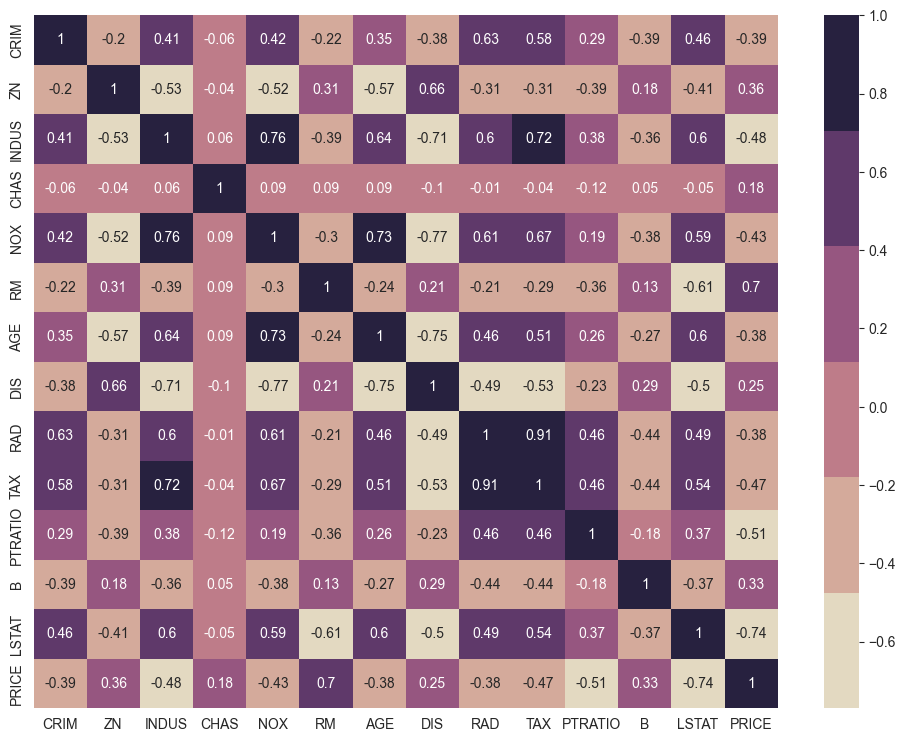

In [10]:
plt.figure(figsize=(12, 9))

# Calcula la matriz de correlación
correlation_matrix = df.corr().round(2)

# Define la paleta de colores personalizada
custom_palette = sns.color_palette("ch:s=-.2,r=.6")

# Crea el heatmap con la paleta personalizada
sns.heatmap(correlation_matrix, annot=True, cmap=custom_palette)

plt.show()

#### RM tiene la correlación positiva mayor con el precio (0.7), LSTAT tiene la menor correlación con el precio(-0.74). Las características RAD, TAX tienen una correlación de 0,91. Estos pares de características están muy correlacionados entre sí. Esto puede afectar al modelo. Lo mismo ocurre con las características DIS y EDAD, que tienen una correlación de -0,75. Las variables predictoras como CRIM, INDUS, NOX, Age, RAD, TAX, PTRATIO, LSTAT tienen una correlación negativa con el objetivo. El aumento de cualquiera de ellas conduce a la disminución del precio de la vivienda. Las variables predictoras como ZN, RM, DIS, B tienen una buena correlación positiva con el objetivo. El aumento de cualquiera de ellas conduce al aumento del precio de la vivienda.

#### Compararemos ahora a la variable PRICE con las otras variables por medio de diagramas de dispersión

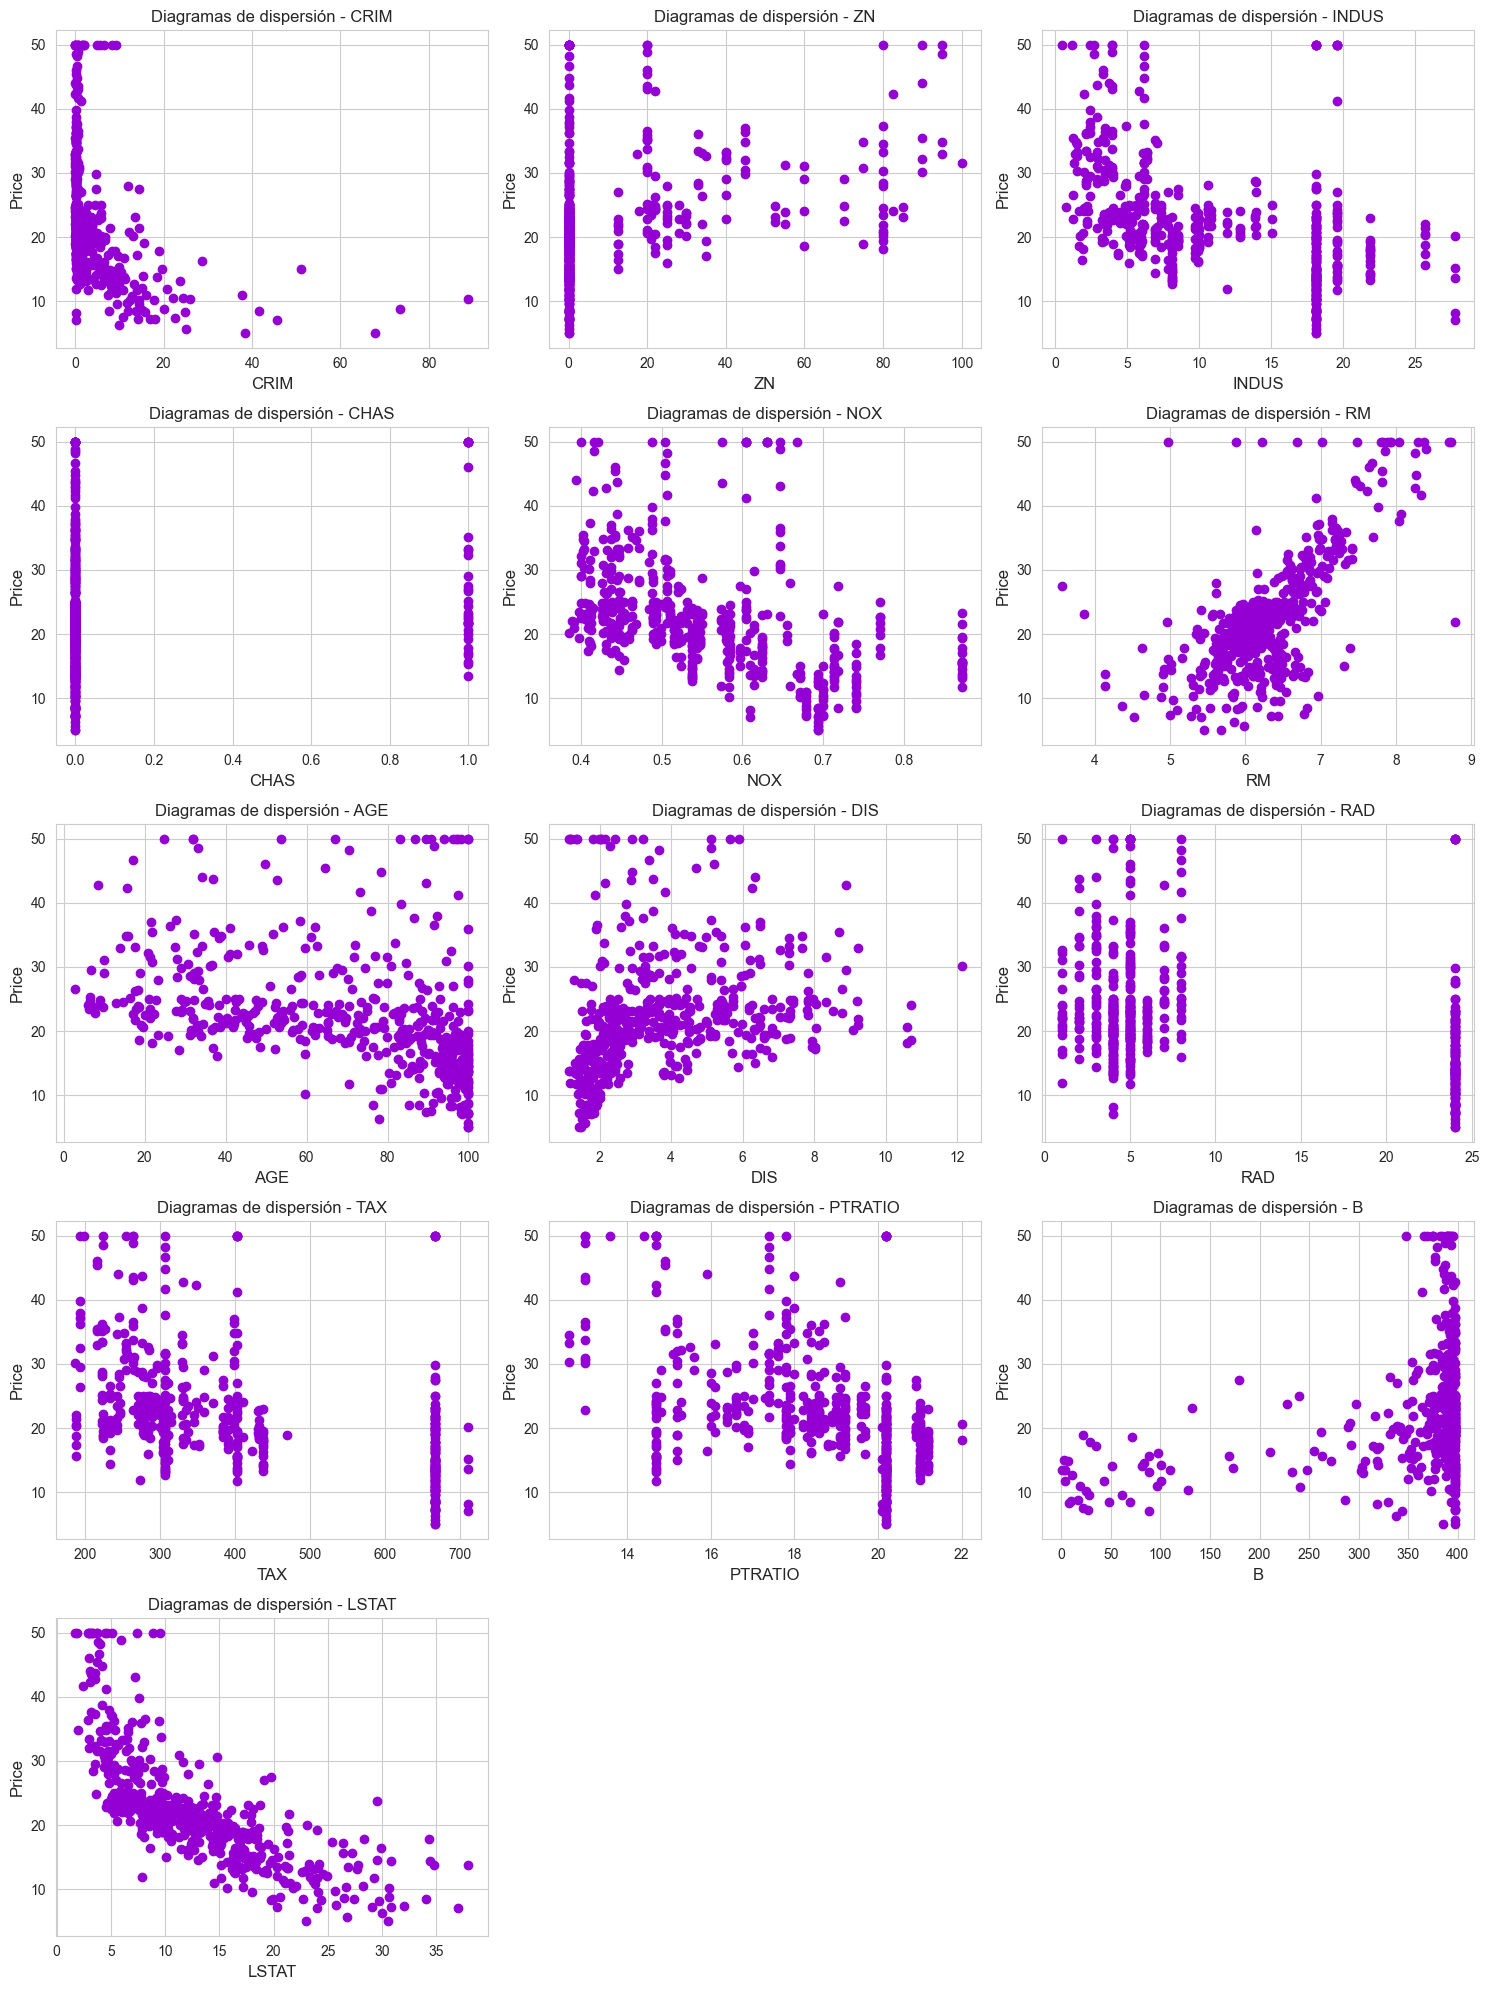

In [11]:
# Variables a visualizar (excluyendo 'PRICE')
features_to_visualize = [feature_name for feature_name in acronyms if feature_name != 'PRICE']

# Número de columnas en el subplot
num_columns = 3

# Calcular el número de filas necesario
num_plots = len(features_to_visualize)
num_rows = (num_plots - 1) // num_columns + 1

# Configurar la figura y los subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4 * num_rows))

# Crear los gráficos en un bucle
for i, feature_name in enumerate(features_to_visualize):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row, col]
    
    ax.scatter(df[feature_name], df['PRICE'], color='#9400D3')
    ax.set_ylabel('Price', size=12)
    ax.set_xlabel(feature_name, size=12)
    ax.set_title(f'Diagramas de dispersión - {feature_name}', size=12)

# Eliminar subplots vacíos si es necesario
for i in range(num_plots, num_rows * num_columns):
    fig.delaxes(axes[i // num_columns, i % num_columns])

plt.tight_layout()
plt.show()

### <span style="color:#9932CC">Reducción de dimensionalidad</span>
#### Utilizaremos PCA para obtener las componentes principales de nuestros datos.

In [12]:
X = df.loc[:, df.columns != 'PRICE'].values
y = df['PRICE'].values

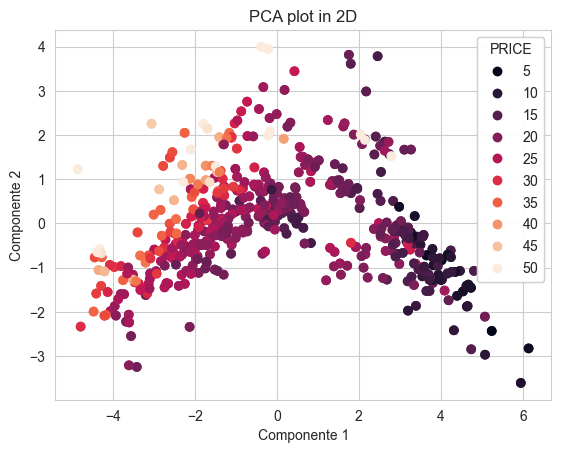

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

# Estandarizar las características
scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(X)

# Aplicar PCA para reducir la dimensionalidad a 2 componentes
X_PCA = PCA(n_components=2).fit_transform(X_estandarizado)

# Crear un gráfico de dispersión 2D
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y)
plt.title('PCA plot in 2D')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')

# Crear una leyenda basada en los colores
scatter = plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=y)
legend1 = plt.legend(*scatter.legend_elements(), title='PRICE')
plt.gca().add_artist(legend1)

plt.show()

#### El resultado es un gráfico de dispersión 2D en el que cada punto representa una observación, los colores de los puntos están determinados por los valores de la variable objetivo 'PRICE', y la dispersión de los puntos en el espacio 2D está determinada por la aplicación de PCA. En función de las componentes principales se observa que los datos de agrupan en dos líneas que se unen de forma aproximadamente ortogonal.

### <span style="color:#9932CC">Regresión lineal</span>
#### Queremos predecir el precio de la vivienda con una sola variable y luego pasar a la regresión con todas las características. Dado que RM muestra una correlación positiva con el precio de la vivienda, utilizaremos LSTAT para el modelo porque está correlacionada a la variable fuertemente,aunque negativamente.

In [14]:
X_population = df.LSTAT
y_price = df.PRICE


X_population = np.array(X_population).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)

print(X_population.shape)
print(y_price.shape)

(506, 1)
(506, 1)


#### Dividiremos los datos en conjuntos de entrenamiento y de prueba. Entrenamos el modelo con el 80% de las muestras y lo probamos con el 20% restante, para porder evaluar el rendimiento del modelo con datos que no se han visto.

In [15]:
# training dataset and labels
train_input = X_population[0:404]
train_output  = y_price[0:404]
 
# valid dataset and labels
test_input = X_population[405:506]
test_output  = y_price[405:506]

#### Con el modelo de regresión visto en clase

In [16]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}
	
	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		#initialize random parameters
		self.parameters['m'] = np.random.uniform(0,1) * -1
		self.parameters['c'] = np.random.uniform(0,1) * -1
		
		#initialize loss
		self.loss = []
		
		#iterate
		for i in range(iters):
			#forward propagation
			predictions = self.forward_propagation(train_input)

			#cost function
			cost = self.cost_function(predictions, train_output)

			#append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(i+1, cost))

			#back propagation
			derivatives = self.backward_propagation(train_input, train_output, predictions)

			#update parameters
			self.update_parameters(derivatives, learning_rate)

		return self.parameters, self.loss

#### Entrenamos el modelo

In [17]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 1201.6611944723638
Iteration = 2, Loss = 1173.0707365825358
Iteration = 3, Loss = 1145.4778239995512
Iteration = 4, Loss = 1118.8476297016985
Iteration = 5, Loss = 1093.1465425745346
Iteration = 6, Loss = 1068.3421249602143
Iteration = 7, Loss = 1044.4030716888863
Iteration = 8, Loss = 1021.2991705404181
Iteration = 9, Loss = 999.00126408651
Iteration = 10, Loss = 977.4812128650073
Iteration = 11, Loss = 956.7118598398969
Iteration = 12, Loss = 936.6669961021047
Iteration = 13, Loss = 917.3213277677723
Iteration = 14, Loss = 898.6504440322057
Iteration = 15, Loss = 880.6307863391489
Iteration = 16, Loss = 863.2396186264433
Iteration = 17, Loss = 846.4549986104936
Iteration = 18, Loss = 830.2557500732693
Iteration = 19, Loss = 814.6214361168483
Iteration = 20, Loss = 799.5323333517125


#### Obtenemos la Predicción final y hacemos un gráfico de la regresión lineal

In [18]:
print(parameters['m'])
print(parameters['c'])
y_pred = test_input*parameters['m'] + parameters['c']

-0.1450507233311148
-0.8492133946792123


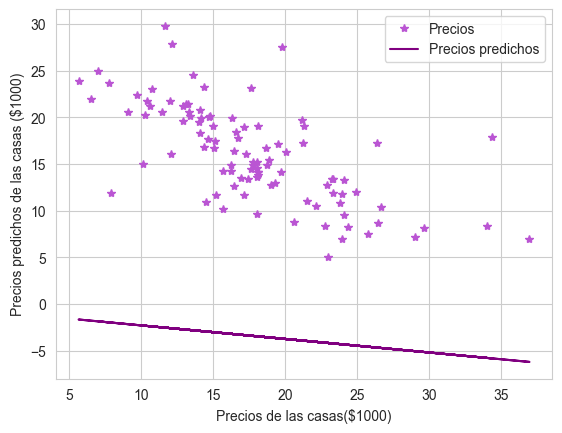

In [19]:
plt.plot(test_input, test_output, '*', color='#BA55D3', label='Precios') 
plt.plot(test_input, y_pred, color='#800080', label='Precios predichos')  

plt.xlabel('Precios de las casas($1000)')
plt.ylabel('Precios predichos de las casas ($1000)')
plt.legend()
plt.show()

### <span style="color:#9932CC">Regresión lineal usando Sklearn</span>

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_input, train_output)


In [21]:
#Prediction on test data
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(test_input)

[[-0.96173416]]
[35.0961864]


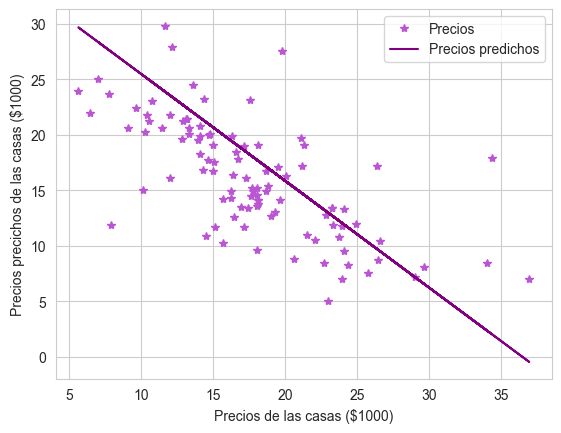

In [22]:
# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '*', color='#BA55D3', label='Precios')
plt.plot(test_input, y_pred, color='#800080', label='Precios predichos')
plt.xlabel('Precios de las casas ($1000)')
plt.ylabel('Precios precichos de las casas ($1000)')
plt.legend()
plt.show()

In [23]:
r_cuadrados=reg.score(train_input, train_output)
print(f"Puntuación R cuadrado en datos de prueba: {r_cuadrados:.2f}")

Puntuación R cuadrado en datos de prueba: 0.50


### <span style="color:#9932CC">Regresión lineal del modelo con varias variables</span>
#### Para este modelo ocuparemos las variables RM, LSTAT y PTRATIO por su mayor correlación.

In [24]:
X_multiple = df[['RM', 'LSTAT', 'PTRATIO']]
print(X_multiple)

        RM  LSTAT  PTRATIO
0    6.575   4.98     15.3
1    6.421   9.14     17.8
2    7.185   4.03     17.8
3    6.998   2.94     18.7
4    7.147   5.33     18.7
..     ...    ...      ...
501  6.593   9.67     21.0
502  6.120   9.08     21.0
503  6.976   5.64     21.0
504  6.794   6.48     21.0
505  6.030   7.88     21.0

[506 rows x 3 columns]


In [25]:
y_multiple=df.PRICE

#### Separamos los datos en el conjunto de prueba y predicción con 80 % en prueba y 20% en predicción.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
             train_test_split(X_multiple, y_multiple, test_size = 0.2, random_state=5)

#### Definimos el algoritmo a utilizar que es el de regresión linear, es el mismo que para una variable. Y entrenamos el modelo.

In [27]:
lr_multiple=LinearRegression().fit(X_train, y_train)

#### Finalmente realizamos una predicción de prueba. Mostramos las pendientes y la intercección.

In [28]:
print(lr_multiple.coef_)
print(lr_multiple.intercept_)
y_pred_multiple=lr_multiple.predict(X_test)

[ 3.9169303  -0.64697098 -0.95483295]
23.68107026871484


#### Calculamos la presición del modelo.

In [29]:
r_cuadradom=lr_multiple.score(X_train, y_train)
print(f"Puntuación R cuadrado en datos de prueba: {r_cuadradom:.2f}")

Puntuación R cuadrado en datos de prueba: 0.67


#### La precisión del modelo no es muy buena puesto que R no es cercano a 1.

### <span style="color:#9932CC">Regresión lineal con todas las variables</span>
#### Observemos ahora si la precisión del modelo mejora si ocupamos todas las variables para nuestra regresión lineal.

In [30]:
X_multiple2 = df.iloc[:, df.columns != 'PRICE']
print(X_multiple2)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

#### Separamos los datos en el conjunto de prueba y predicción con 80 % en prueba y 20% en predicción.

In [31]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train, y_test = \
             train_test_split(X_multiple2, y_multiple, test_size = 0.2, random_state=5)

In [32]:
lr_multiple2=LinearRegression().fit(X_train2, y_train)

In [33]:
print(lr_multiple2.coef_)
print(lr_multiple2.intercept_)
y_pred_multiple2=lr_multiple2.predict(X_test2)

[-1.30799852e-01  4.94030235e-02  1.09535045e-03  2.70536624e+00
 -1.59570504e+01  3.41397332e+00  1.11887670e-03 -1.49308124e+00
  3.64422378e-01 -1.31718155e-02 -9.52369666e-01  1.17492092e-02
 -5.94076089e-01]
37.91248700975064


In [34]:
r_cuadradom2=lr_multiple2.score(X_train2, y_train)
print(f"Puntuación R cuadrado en datos de prueba: {r_cuadradom2:.2f}")

Puntuación R cuadrado en datos de prueba: 0.74


#### Comparando la precisión del modelo, esta mejoró al utilizar un mayor número de variables.

### <span style="color:#9932CC">Regresión lineal con características transformadas por PCA</span>
#### Para hacer una comparación completa, realizaremos la regresión lineal con las características obtenidas con PCA. El procedimiento es el mismo que para los casos anteriores, lo que nos importa principalmente es el error.

In [35]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_trainPCA, X_testPCA, y_trainPCA, y_testPCA = train_test_split(X_PCA, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión lineal
modelo_regresionPCA = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
modelo_regresionPCA.fit(X_trainPCA, y_trainPCA)

# Calcular la puntuación R cuadrado en los datos de prueba
r_cuadradoPCA = modelo_regresionPCA.score(X_testPCA, y_testPCA)
print(f"Puntuación R cuadrado en datos de prueba: {r_cuadradoPCA:.2f}")

Puntuación R cuadrado en datos de prueba: 0.38


### <span style="color:#9932CC">Conclusiones</span>
#### Resultados de los Modelos de Regresión Lineal
| Modelo            | R_cuadrada |
|-------------------|------------|
| Una variable      | 0.50       |
| Tres variables    | 0.67       |
| Todas las variables| 0.74       |
| Componentes PCA   | 0.38       |

Basado en los valores de R cuadrada para los diferentes modelos de regresión lineal, podemos realizar las siguientes observaciones:

- La regresión lineal, tal como se presentó en clase, parece estar lejos de los datos que intenta aproximar. Para el modelo que utiliza una sola variable independiente, obtenemos un R^2 de 0.50, lo que sugiere que el modelo es capaz de explicar el 50% de la variabilidad en la variable objetivo. Sin embargo, aún existe una cantidad significativa de variabilidad no explicada.

- El modelo que utiliza tres variables independientes muestra una mejora en la interpretación con un R^2 de 0.67. Es importante destacar que estas variables se seleccionaron cuidadosamente utilizando métodos como el análisis de correlación, eligiendo las que mostraban una correlación significativa con la variable objetivo.

- Cuando se eligieron variables aleatorias sin considerar la correlación, el R^2 disminuyó a 0.49, lo que es prácticamente similar al modelo de una sola variable.

- Al considerar todas las variables disponibles, obtuvimos un R^2 que fue el más alto de todos los modelos evaluados, aproximadamente 0.74. Esto sugiere que este modelo se ajusta mejor a los datos y puede explicar alrededor del 74% de la variabilidad en la variable objetivo.

- El modelo que utiliza las componentes principales (PCA) tiene un R^2 de 0.38. A pesar de la reducción de la dimensionalidad, este modelo explica un porcentaje menor de la variabilidad en comparación con el modelo que utiliza todas las variables originales.

En función de los valores de R^2, el modelo que utiliza todas las variables originales parece ser el más efectivo para explicar la variabilidad en la variable objetivo. Sin embargo, la elección del modelo no debe basarse únicamente en el R^2; es importante considerar otros factores, como la interpretabilidad del modelo, el contexto del problema y realizar una validación cruzada o pruebas adicionales para evaluar su rendimiento en datos no vistos. en datos no vistos.    |a  |